# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [3]:
from damavand.damavand.datasets.downloaders import read_addresses, MaFaulDaDownloader
from damavand.damavand.datasets.digestors import MaFauldDa
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np

import requests
from zipfile import ZipFile
import os

# Instantiating a downloader object

In [4]:
addresses = read_addresses()
downloader = MaFaulDaDownloader({key: addresses['MaFaulDa'][key] for key in ['normal.zip', 'imbalance.zip']})
downloader.download_extract('mafaulda_zip_files/', 'mafaulda/')

Downloading:  normal.zip
Downloading:  imbalance.zip
Extracting:  normal.zip
Extracting:  imbalance.zip


# Instantiating a digestor object

In [5]:
mafaulda = MaFauldDa('mafaulda/', os.listdir('mafaulda/'), channels = [2])
mining_params = {
    'win_len': 50000,
    'hop_len': 50000
}
mafaulda.mine(mining_params)

# Aggregating data over the third channel

In [6]:
df = pd.concat(mafaulda.data[2]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,49992,49993,49994,49995,49996,49997,49998,49999,state,severity
0,-0.231230,0.297630,-0.455800,0.344070,-0.31469,0.227420,-0.085623,-0.061906,0.245820,-0.192010,...,0.18111,-0.264870,-0.212490,0.129100,-0.645030,0.399060,-0.342930,0.44979,normal,_
1,-0.589650,-0.062921,0.071187,-0.042377,0.25908,-0.218210,0.356830,-0.135670,0.323540,-0.098067,...,-0.22501,0.369400,-0.273870,0.216510,-0.015357,0.070057,0.180090,-0.22005,normal,_
2,0.363720,-0.221050,0.365470,-0.210030,0.19038,0.082693,0.037519,0.263220,-0.229470,0.422830,...,0.00694,-0.679300,0.339020,-0.827550,0.373430,-0.621180,0.095277,-0.17694,normal,_
3,-0.228640,0.228080,-0.446400,0.419280,-0.53259,0.353300,-0.408120,0.032302,-0.064264,-0.342730,...,0.28903,-0.046141,0.028821,0.206350,-0.199350,0.388030,-0.263010,0.38564,normal,_
4,0.055384,-0.786410,-0.224140,-0.417240,-0.52573,-0.176980,-1.019300,0.034191,-1.272100,-0.128570,...,-0.49976,0.231580,-0.204870,0.007769,0.064333,-0.370690,0.304050,-0.54631,normal,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,-0.311730,-1.187100,-0.382990,-1.053200,-0.58364,-0.774110,-0.956640,-0.560640,-1.280800,-0.484940,...,1.40880,0.501860,1.092800,1.033500,0.820060,1.412300,0.790370,1.61080,imbalance,35g
1524,-2.315200,-3.357100,-2.961300,-3.397100,-2.77920,-2.500600,-2.475600,-1.796600,-2.624300,-2.065200,...,-0.38228,-1.138500,-0.583170,-0.962650,-0.974560,-0.952910,-1.534300,-0.90455,imbalance,35g
1525,-1.524000,-0.636660,-1.215600,-0.648790,-0.90392,-0.853370,-0.462260,-1.244800,-0.471820,-1.278100,...,2.51980,3.297200,2.573600,2.727100,2.588400,2.059500,2.449000,1.92940,imbalance,35g
1526,3.094700,2.672400,3.293200,2.742200,2.76320,3.045800,2.592300,3.296300,2.582200,3.557700,...,-2.13900,-2.549400,-2.578100,-1.840900,-2.112500,-1.288900,-2.399600,-1.80870,imbalance,35g


In [7]:
signals, metadata = df.iloc[:, : -2], df.iloc[:, -2 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,-0.231230,0.297630,-0.455800,0.344070,-0.31469,0.227420,-0.085623,-0.061906,0.245820,-0.192010,...,0.48099,-0.58090,0.18111,-0.264870,-0.212490,0.129100,-0.645030,0.399060,-0.342930,0.44979
1,-0.589650,-0.062921,0.071187,-0.042377,0.25908,-0.218210,0.356830,-0.135670,0.323540,-0.098067,...,-0.18663,0.29106,-0.22501,0.369400,-0.273870,0.216510,-0.015357,0.070057,0.180090,-0.22005
2,0.363720,-0.221050,0.365470,-0.210030,0.19038,0.082693,0.037519,0.263220,-0.229470,0.422830,...,-0.43377,-0.23525,0.00694,-0.679300,0.339020,-0.827550,0.373430,-0.621180,0.095277,-0.17694
3,-0.228640,0.228080,-0.446400,0.419280,-0.53259,0.353300,-0.408120,0.032302,-0.064264,-0.342730,...,0.40011,-0.20710,0.28903,-0.046141,0.028821,0.206350,-0.199350,0.388030,-0.263010,0.38564
4,0.055384,-0.786410,-0.224140,-0.417240,-0.52573,-0.176980,-1.019300,0.034191,-1.272100,-0.128570,...,-0.40152,0.40653,-0.49976,0.231580,-0.204870,0.007769,0.064333,-0.370690,0.304050,-0.54631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,-0.311730,-1.187100,-0.382990,-1.053200,-0.58364,-0.774110,-0.956640,-0.560640,-1.280800,-0.484940,...,1.40240,0.24949,1.40880,0.501860,1.092800,1.033500,0.820060,1.412300,0.790370,1.61080
1524,-2.315200,-3.357100,-2.961300,-3.397100,-2.77920,-2.500600,-2.475600,-1.796600,-2.624300,-2.065200,...,-0.04875,-0.90356,-0.38228,-1.138500,-0.583170,-0.962650,-0.974560,-0.952910,-1.534300,-0.90455
1525,-1.524000,-0.636660,-1.215600,-0.648790,-0.90392,-0.853370,-0.462260,-1.244800,-0.471820,-1.278100,...,2.33000,3.31100,2.51980,3.297200,2.573600,2.727100,2.588400,2.059500,2.449000,1.92940
1526,3.094700,2.672400,3.293200,2.742200,2.76320,3.045800,2.592300,3.296300,2.582200,3.557700,...,-1.47930,-2.38000,-2.13900,-2.549400,-2.578100,-1.840900,-2.112500,-1.288900,-2.399600,-1.80870


In [8]:
metadata

,state,severity
0,normal,_
1,normal,_
2,normal,_
3,normal,_
4,normal,_
...,...,...
1523,imbalance,35g
1524,imbalance,35g
1525,imbalance,35g
1526,imbalance,35g


In [9]:
metadata['comb'] = metadata['state'] + '_' + metadata['severity']
metadata['comb'].value_counts()

,count
comb,
normal__,196
imbalance_6g,196
imbalance_20g,196
imbalance_15g,192
imbalance_10g,192
imbalance_30g,188
imbalance_25g,188
imbalance_35g,180


# Signal Processing

## Envelope Extraction

In [10]:
signals_env = env(signals)
signals_env.shape

(1528, 50000)

## FFT

In [11]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 24500], 'bandpass', fs = 51200, output='sos')

In [12]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(1528, 25000)

# ZoomedFFT

In [13]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 51200, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(1528, 2000)

# STFT

In [14]:
STFT_window = scipy.signal.windows.hann(2048)
STFT_freq_filter = scipy.signal.butter(25, [5, 24500], 'bandpass', fs = 51200, output='sos')
signals_env_STFT = stft(signals_env, 2048, 1000, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(1528, 48, 1024)

# Statistical Features

In [15]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,0.000590,0.094555,0.307499
1,-0.001907,0.096338,0.310389
2,-0.000369,0.096233,0.310215
3,0.000521,0.095689,0.309336
4,-0.001582,0.136544,0.369522
...,...,...,...
1523,-0.000845,0.905498,0.951577
1524,0.013038,5.080314,2.253993
1525,-0.011198,5.094767,2.257187
1526,-0.005905,5.100610,2.258461


# Visualization

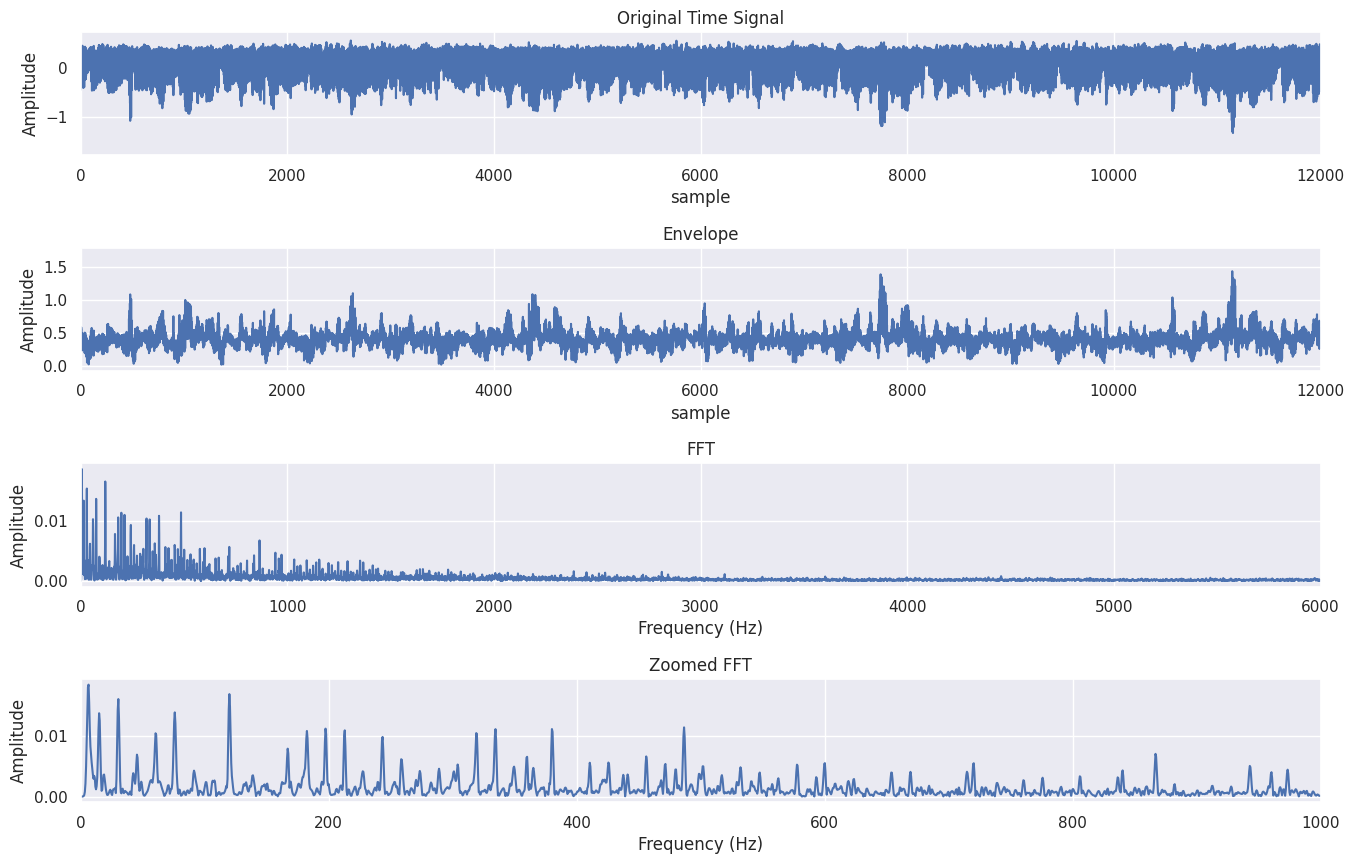

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 12000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 12000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(50000, 51200), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 6000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

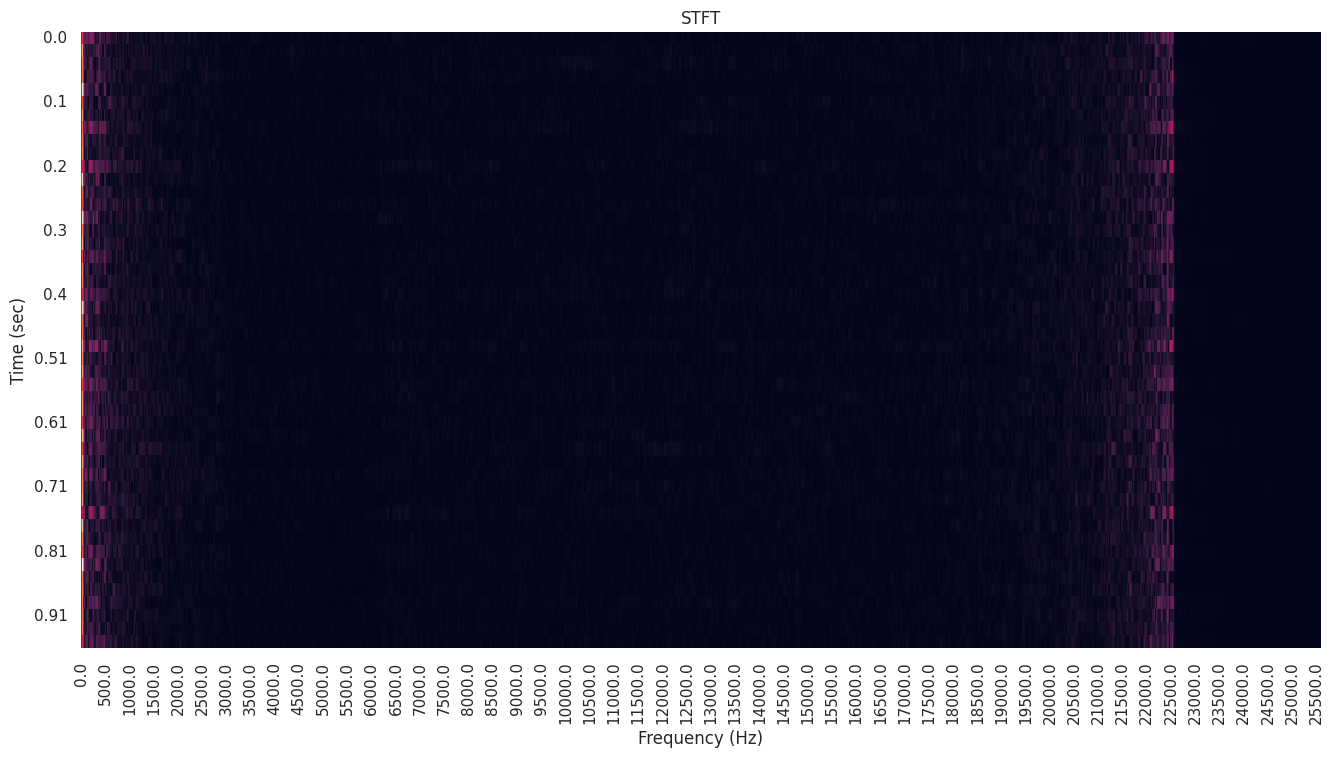

In [18]:
t = np.linspace(0, 50000/52600, 48)
f = fft_freq_axis(2048, 51200)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()